In [127]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


https://www.notion.so/Conceitos-fundamentais-de-Machine-Learning-e-Inteligencia-artificial-6ca2615ecd7540f79d95baea989708ad#eb57323182cb438982a348c2f0de4429

In [6]:
df = pd.read_csv("sao-paulo-properties-april-2019.csv")

In [7]:
df_rent = df[df["Negotiation Type"]=="rent"]
df_sale = [df["Negotiation Type"]=="sale"]

## 3. Visualização do conjunto de dados

In [43]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7228 entries, 0 to 11209
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             7228 non-null   int64  
 1   Condo             7228 non-null   int64  
 2   Size              7228 non-null   int64  
 3   Rooms             7228 non-null   int64  
 4   Toilets           7228 non-null   int64  
 5   Suites            7228 non-null   int64  
 6   Parking           7228 non-null   int64  
 7   Elevator          7228 non-null   int64  
 8   Furnished         7228 non-null   int64  
 9   Swimming Pool     7228 non-null   int64  
 10  New               7228 non-null   int64  
 11  District          7228 non-null   object 
 12  Negotiation Type  7228 non-null   object 
 13  Property Type     7228 non-null   object 
 14  Latitude          7228 non-null   float64
 15  Longitude         7228 non-null   float64
dtypes: float64(2), int64(11), object(3)
memor

In [41]:
df_rent.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,3077.669065,825.194798,89.486165,2.304234,2.105562,1.024488,1.452269,0.299806,0.172939,0.487963,0.000830,-22.032278,-43.500873
std,3522.830284,835.621937,63.976416,0.829108,0.998162,0.884241,0.889535,0.458205,0.378220,0.499890,0.028802,5.962534,11.675070
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1350.000000,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598066,-46.689788
50%,2000.000000,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.555869,-46.644793
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.522756,-46.585110
max,50000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Condo'}>,
        <AxesSubplot:title={'center':'Size'}>,
        <AxesSubplot:title={'center':'Rooms'}>],
       [<AxesSubplot:title={'center':'Toilets'}>,
        <AxesSubplot:title={'center':'Suites'}>,
        <AxesSubplot:title={'center':'Parking'}>,
        <AxesSubplot:title={'center':'Elevator'}>],
       [<AxesSubplot:title={'center':'Furnished'}>,
        <AxesSubplot:title={'center':'Swimming Pool'}>,
        <AxesSubplot:title={'center':'New'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Longitude'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

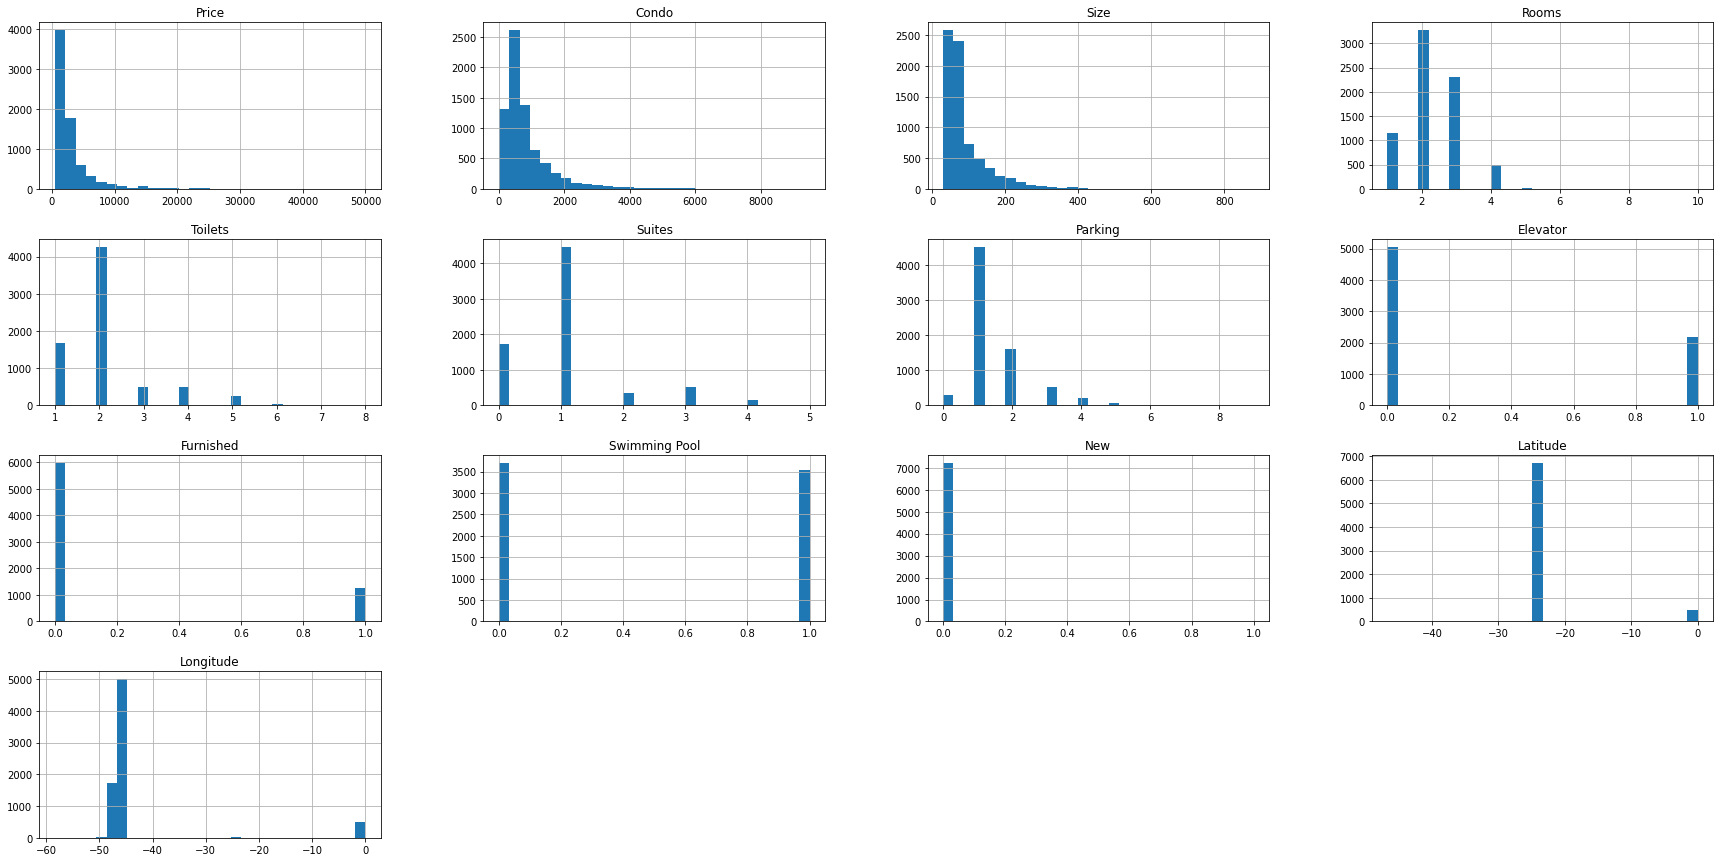

In [31]:
df_rent.hist(bins=30, figsize=(30, 15))

In [36]:
df_rent["Property Type"].value_counts()

apartment    7228
Name: Property Type, dtype: int64

In [42]:
df_rent["District"].value_counts()

Mooca/São Paulo              178
Moema/São Paulo              163
Vila Mariana/São Paulo       161
Morumbi/São Paulo            159
Cambuci/São Paulo            153
                            ... 
Lajeado/São Paulo              8
Parque do Carmo/São Paulo      6
Guaianazes/São Paulo           6
Jardim São Luis/São Paulo      3
Grajaú/São Paulo               2
Name: District, Length: 94, dtype: int64

In [45]:
df_rent.corr()["Price"].sort_values(ascending=False)

Price            1.000000
Size             0.731795
Condo            0.700361
Parking          0.640743
Suites           0.588329
Toilets          0.583488
Rooms            0.390951
Swimming Pool    0.206884
Furnished        0.171859
Elevator         0.031860
New             -0.008477
Latitude        -0.036935
Longitude       -0.038362
Name: Price, dtype: float64

## 4. Preparação de dados para modelos de ML

### Limpeza de dados desnecessários

In [97]:
df_cleaned = df_rent.drop(["New", "Property Type", "Negotiation Type"], axis=1)

In [98]:
df_cleaned.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,Artur Alvim/São Paulo,-23.525025,-46.482436


### Tratamento de dados categóricos

In [99]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

district_encoded = ordinal_encoder.fit_transform(df_cleaned[["District"]])
district_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [9.],
       [9.],
       [9.]])

In [100]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(df_cleaned[["District"]])
housing_cat_1hot

<7228x94 sparse matrix of type '<class 'numpy.float64'>'
	with 7228 stored elements in Compressed Sparse Row format>

In [101]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [102]:
housing_cat_1hot.toarray().shape

(7228, 94)

In [103]:
cat_encoder.categories_

[array(['Alto de Pinheiros/São Paulo', 'Anhanguera/São Paulo',
        'Aricanduva/São Paulo', 'Artur Alvim/São Paulo',
        'Barra Funda/São Paulo', 'Bela Vista/São Paulo', 'Belém/São Paulo',
        'Bom Retiro/São Paulo', 'Brasilândia/São Paulo',
        'Brooklin/São Paulo', 'Brás/São Paulo', 'Butantã/São Paulo',
        'Cachoeirinha/São Paulo', 'Cambuci/São Paulo',
        'Campo Belo/São Paulo', 'Campo Grande/São Paulo',
        'Campo Limpo/São Paulo', 'Cangaíba/São Paulo',
        'Capão Redondo/São Paulo', 'Carrão/São Paulo',
        'Casa Verde/São Paulo', 'Cidade Ademar/São Paulo',
        'Cidade Dutra/São Paulo', 'Cidade Líder/São Paulo',
        'Cidade Tiradentes/São Paulo', 'Consolação/São Paulo',
        'Cursino/São Paulo', 'Ermelino Matarazzo/São Paulo',
        'Freguesia do Ó/São Paulo', 'Grajaú/São Paulo',
        'Guaianazes/São Paulo', 'Iguatemi/São Paulo', 'Ipiranga/São Paulo',
        'Itaim Bibi/São Paulo', 'Itaim Paulista/São Paulo',
        'Itaquera/Sã

In [104]:
one_hot = pd.get_dummies(df_cleaned["District"])

df = df_cleaned.drop('District',axis = 1)
df = df.join(one_hot)
df

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,930,220,47,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000,148,45,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000,100,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000,200,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1300,410,55,2,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11206,21000,3000,208,4,4,3,3,1,1,1,...,0,0,0,0,0,0,0,0,0,0
11207,3800,710,55,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
11208,5000,2354,205,3,2,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5. Selecione e treino múltiplos modelos

In [118]:
from sklearn.model_selection import train_test_split

In [106]:
Y = df["Price"]
X = df.loc[:, df.columns != "Price"]

In [107]:
X.head()

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,Latitude,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,220,47,2,2,1,1,0,0,0,-23.543138,...,0,0,0,0,0,0,0,0,0,0
1,148,45,2,2,1,1,0,0,0,-23.550239,...,0,0,0,0,0,0,0,0,0,0
2,100,48,2,2,1,1,0,0,0,-23.542818,...,0,0,0,0,0,0,0,0,0,0
3,200,48,2,2,1,1,0,0,0,-23.547171,...,0,0,0,0,0,0,0,0,0,0
4,410,55,2,2,1,1,1,0,0,-23.525025,...,0,0,0,0,0,0,0,0,0,0


In [111]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

### Regressão Linear

In [120]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [124]:
some_data = X.iloc[:5]
some_labels = Y.iloc[:5]

print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [ 855.16235352  786.16540527  869.20892334  882.19250488 1082.5246582 ]
Labels: [930, 1000, 1000, 1000, 1300]


In [134]:
from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train, preds)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

1918.354128344279

### Decision Tree Regressor

In [135]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [136]:
preds = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, preds)

tree_rmse = np.sqrt(tree_mse)
tree_rmse

38.92474700453177

### Avaliação mais precisa usando Cross Validation

In [162]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
                           
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [2667.5411216  1810.16365031 2043.63311616 1692.20676008 1743.64405373
 1635.31720021 1963.29335835 1394.40779174 1610.39752897 1367.68163558]
Mean: 1792.8286216721567
Standard deviation: 356.0207200978578


In [163]:
scores = cross_val_score(lin_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
                           
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [2792.01814399 2021.78936059 2400.92470536 1566.55581303 2032.44638342
 1592.15891994 1804.63258433 1430.29282552 1788.33084391 1777.10545882]
Mean: 1920.6255038929455
Standard deviation: 392.171710755843


### RandomForest Regressor

In [146]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [147]:
preds = rf_reg.predict(x_train)
rf_mse = mean_squared_error(y_train, preds)

rf_rmse = np.sqrt(rf_mse)
rf_rmse

680.2440082878388

In [148]:
scores = cross_val_score(rf_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)
                           
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rf_rmse_scores)

Scores: [2693.27465555 1803.9991429  2051.42556261 1692.96199659 1709.95275928
 1633.15720468 1937.90863202 1259.20085008 1625.74257834 1448.03605146]
Mean: 1785.5659433508547
Standard deviation: 370.43433109376446


## 6. Avaliando seu modelo e otimizando-o

### Otimizando seu modelo através do GridSearch

In [155]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [156]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [157]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [158]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2066.2519781858764 {'max_features': 2, 'n_estimators': 3}
1944.9918601616891 {'max_features': 2, 'n_estimators': 10}
1859.9025392378746 {'max_features': 2, 'n_estimators': 30}
2089.479198697163 {'max_features': 4, 'n_estimators': 3}
1958.0781510070492 {'max_features': 4, 'n_estimators': 10}
1852.6976964948853 {'max_features': 4, 'n_estimators': 30}
2199.1504820566743 {'max_features': 6, 'n_estimators': 3}
1898.3599191476223 {'max_features': 6, 'n_estimators': 10}
1845.644468125253 {'max_features': 6, 'n_estimators': 30}
2101.2185547343997 {'max_features': 8, 'n_estimators': 3}
1931.9000845296769 {'max_features': 8, 'n_estimators': 10}
1857.509732233663 {'max_features': 8, 'n_estimators': 30}
2075.9236316048837 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1944.7712200076598 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
2136.1177940274924 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1910.5513347270035 {'bootstrap': False, 'max_features': 3, 'n_es

### Avaliando seu modelo em dados de teste

In [160]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_rmse)

1806.508973013021
